In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics as stats
import category_encoders as ce

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

rcParams["figure.figsize"] = (10, 9)
plt.style.use('ggplot')

# Load dataset

In [3]:
# You can download the dataset here: https://archive-beta.ics.uci.edu/dataset/19/car+evaluation
features = ["buying_price", "price_of_the_maintenance", "number_of_doors",
           "persons_capacity", "size_of_luggage_boot", "safety", "car_acceptability"]
df = pd.read_csv("./car.data", names=features)
df.head()

,buying_price,price_of_the_maintenance,number_of_doors,persons_capacity,size_of_luggage_boot,safety,car_acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Data Visualization

## Barplots for categorical features

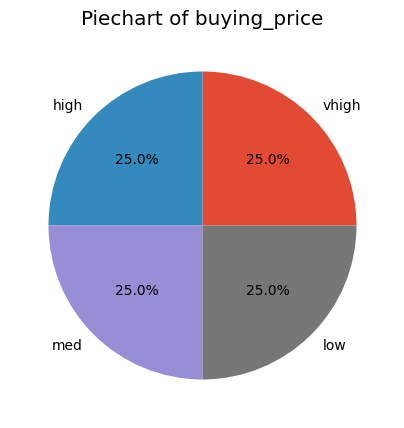

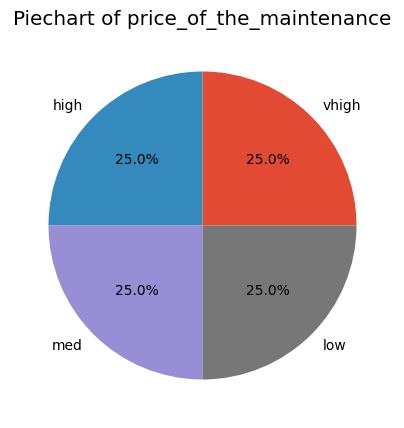

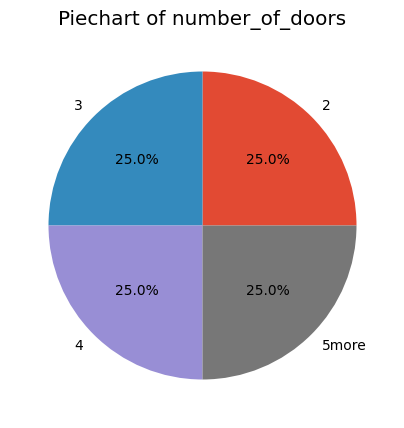

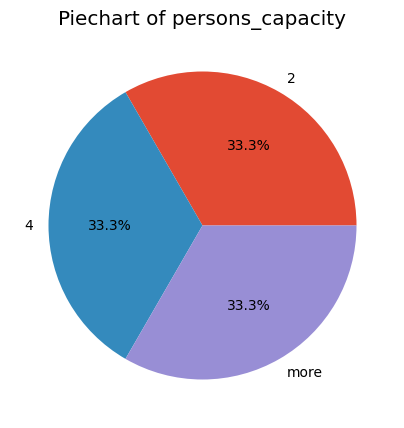

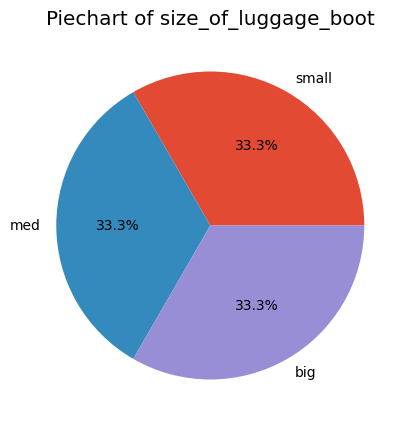

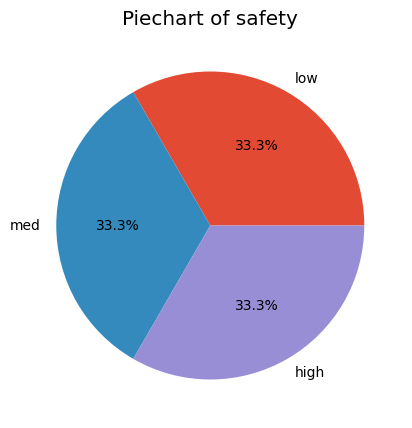

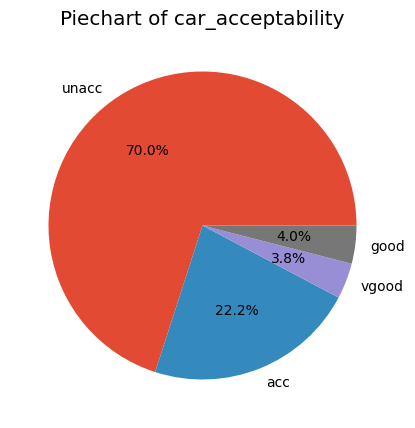

In [4]:
for feature in features:
    _, ax = plt.subplots(figsize=(5, 5))
    labels = df[feature].unique().tolist()
    sizes_list = []
    for label in labels:
        sizes_list.append(df[feature].loc[df[feature] == label].count() / df[feature].count())   

    ax.pie(sizes_list, labels=labels, autopct="%1.1f%%")
    ax.set_title(f"Piechart of {feature}")

# Pre-processing

In [5]:
print(f"NAs values = {df.isna().sum().sum()}")

NAs values = 0


In [6]:
# Renaming the columns to transform into int

df.replace(to_replace={"5more": 5, "more": 5}, inplace=True)

## Encoding the categorical features

In [7]:
encoder = ce.BinaryEncoder(cols=["buying_price", "price_of_the_maintenance", 
                                 "size_of_luggage_boot", "safety"], return_df=True)
data_encoder = encoder.fit_transform(df)
data_encoder

,buying_price_0,buying_price_1,buying_price_2,price_of_the_maintenance_0,price_of_the_maintenance_1,price_of_the_maintenance_2,number_of_doors,persons_capacity,size_of_luggage_boot_0,size_of_luggage_boot_1,safety_0,safety_1,car_acceptability
0,0,0,1,0,0,1,2,2,0,1,0,1,unacc
1,0,0,1,0,0,1,2,2,0,1,1,0,unacc
2,0,0,1,0,0,1,2,2,0,1,1,1,unacc
3,0,0,1,0,0,1,2,2,1,0,0,1,unacc
4,0,0,1,0,0,1,2,2,1,0,1,0,unacc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1,0,0,1,0,0,5,5,1,0,1,0,good
1724,1,0,0,1,0,0,5,5,1,0,1,1,vgood
1725,1,0,0,1,0,0,5,5,1,1,0,1,unacc
1726,1,0,0,1,0,0,5,5,1,1,1,0,good


# Split Dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_encoder.drop(columns="car_acceptability").values, 
                                                    data_encoder["car_acceptability"], 
                                                    test_size=0.30, 
                                                    random_state=123)

# Decision Tree

## Train

In [9]:
clf = DecisionTreeClassifier(random_state=123)
scores = cross_val_score(clf, X_train, y_train, cv=10)
print(scores)
clf.fit(X_train, y_train)

[0.95867769 0.98347107 0.95867769 0.95041322 0.96694215 0.95041322
 0.95041322 0.94214876 0.9338843  0.975     ]


DecisionTreeClassifier(random_state=123)

## Plotting

In [10]:
plt.figure(figsize=(100, 100))
plot_tree(clf)
plt.title("Decision tree structured")
plt.show()

## Metrics

In [11]:
yhat = clf.predict(X_test)
print(f"Accuracy = {accuracy_score(y_test, yhat):.4f}")
print(f"Precision = {precision_score(y_test, yhat, average='macro'):.4f}")

Accuracy = 0.9538
Precision = 0.8679


**TODO:** Try to prune the tree or to define a threeshold of samples for each leaf to avoid overfitting